In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<br><span style="font-size : 32px; font-weight: bold;">🚀 read the data</span>



In [147]:
data = pd.read_csv('supermarket_sales.csv')
data.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

<br><span style="font-size : 32px; font-weight: bold;">Data preproccessing and Cleaning 🧹</span>


In [148]:
print(data.isnull().count())
print(f"\ndata observations :{len(data)} ")

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

data observations :1000 


In [149]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [150]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
print(data['Date'].dtypes)


datetime64[ns]


In [151]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.time
data['Time'].dtype

dtype('O')

<br><span style="font-size : 32px; font-weight: bold;">🔍Analysis  </span>



In [167]:
# Assuming `data` is your DataFrame
branch_counts = data['Branch'].value_counts()
#Create a horizontal bar plot
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(6, 4))


sns.barplot(y=branch_counts.index, x=branch_counts.values,hue=branch_counts.index,palette="viridis",legend=False)

# Add labels and title
plt.ylabel('Branch', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=16)
plt.title('Branch Distribution', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adding count labels
for index, value in enumerate(branch_counts.values):
    plt.text(value, index, f'{value}', va='center', fontsize=14)
plt.legend([],[], frameon=False)
plt.show()



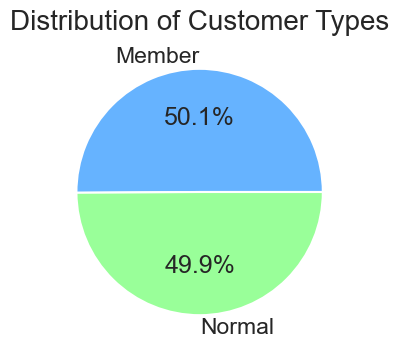

In [153]:


customer_type_counts = data['Customer type'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'])

# Add a title
plt.title('Distribution of Customer Types', fontsize=20)

# Display the plot
plt.show()


In [154]:

gender = data['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', colors=['#D6BD98', '#699595'])

# Add a title
plt.title('Distribution of Customer Types', fontsize=20)

# Display the plot
plt.show()


In [155]:


# Plotting
plt.figure(figsize=(6, 4))
plt.hist(data['Unit price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Unit price')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Price')
plt.grid(axis='y')
plt.show()


In [156]:
data.head(10)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   
5  699-14-3026      C  Naypyitaw        Normal    Male   
6  355-53-5943      A     Yangon        Member  Female   
7  315-22-5665      C  Naypyitaw        Normal  Female   
8  665-32-9167      A     Yangon        Member  Female   
9  692-92-5582      B   Mandalay        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   
5  Electronic accessories       85.39         7  29.8865  627.6165 2019-03-25   
6  Electronic accessories       68.84         6  20.6520  433.6920 2019-02-25   
7      Home and lifestyle       73.56        10  36.7800  772.3800 2019-02-24   
8       Health and beauty       36.26         2   3.6260   76.1460 2019-01-10   
9      Food and beverages       54.84         3   8.2260  172.7460 2019-02-20   

       Time      Payment    cogs  gross margin percentage  gross income  \
0  13:08:00      Ewallet  522.83                 4.761905       26.1415   
1  10:29:00         Cash   76.40                 4.761905        3.8200   
2  13:23:00  Credit card  324.31                 4.761905       16.2155   
3  20:33:00      Ewallet  465.76                 4.761905       23.2880   
4  10:37:00      Ewallet  604.17                 4.761905       30.2085   
5  18:30:00      Ewallet  597.73                 4.761905       29.8865   
6  14:36:00      Ewallet  413.04                 4.761905       20.6520   
7  11:38:00      Ewallet  735.60                 4.761905       36.7800   
8  17:15:00  Credit card   72.52                 4.761905        3.6260   
9  13:27:00  Credit card  164.52                 4.761905        8.2260   

   Rating  
0     9.1  
1     9.6  
2     7.4  
3     8.4  
4     5.3  
5     4.1  
6     5.8  
7     8.0  
8     7.2  
9     5.9

In [157]:
data['Quantity'].value_counts()

Quantity
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: count, dtype: int64

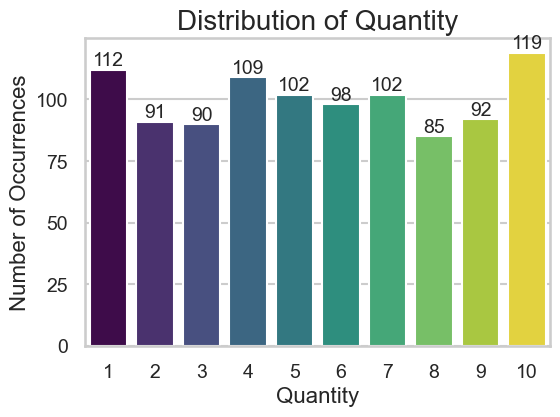

In [166]:

quantity_counts = data['Quantity'].value_counts().sort_index()


plt.figure(figsize=(6, 4))
sns.barplot(x=quantity_counts.index, y=quantity_counts.values,hue=quantity_counts.index, palette="viridis")

plt.xlabel('Quantity', fontsize=16)
plt.ylabel('Number of Occurrences', fontsize=16)
plt.title('Distribution of Quantity', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adding count labels on top of the bars
for index, value in enumerate(quantity_counts.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=14)
plt.legend([],[], frameon=False)
# Display the plot
plt.show()

In [159]:

# Convert the 'Date' column to datetime format if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# Create a distribution plot
plt.figure(figsize=(8, 3))
sns.histplot(data['Date'], kde=True, color='blue', bins=15)

# Add labels and title
plt.xlabel('Date', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Date Distribution', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Display the plot
plt.show()

In [160]:

# Create a count plot to visualize the relationship between Gender and Product line
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='Product line', hue='Gender', palette='viridis')

# Add the counts above the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, int(height), ha='center', va='bottom', fontsize=12)

# Move the legend outside of the plot
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and title
plt.xlabel('Product Line', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Distribution of Product Line by Gender', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout to make space for the legend
plt.tight_layout()

# Display the plot
plt.show()


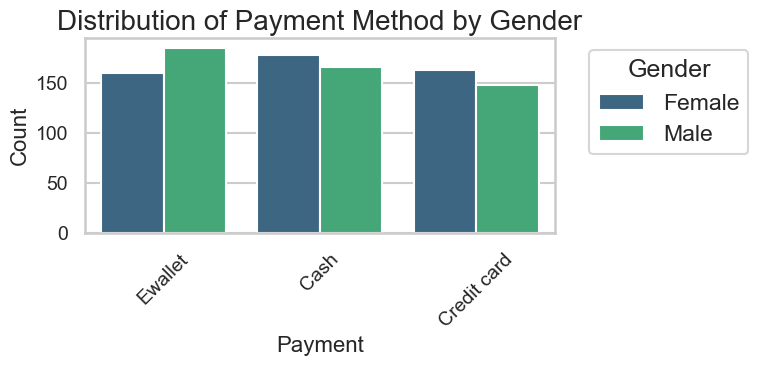

In [161]:

plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Payment', hue='Gender', palette='viridis')

# Move the legend outside of the plot
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and title
plt.xlabel('Payment', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Distribution of Payment Method by Gender', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout to make space for the legend
plt.tight_layout()

# Display the plot
plt.show()


In [162]:
data.head(1)

Invoice ID Branch    City Customer type  Gender       Product line  \
0  750-67-8428      A  Yangon        Member  Female  Health and beauty   

   Unit price  Quantity   Tax 5%     Total       Date      Time  Payment  \
0       74.69         7  26.1415  548.9715 2019-01-05  13:08:00  Ewallet   

     cogs  gross margin percentage  gross income  Rating  
0  522.83                 4.761905       26.1415     9.1

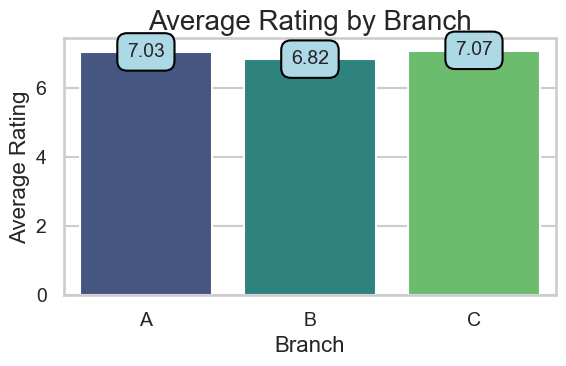

In [163]:

# Calculate the average rating for each branch
avg_rating_by_branch = data.groupby('Branch')['Rating'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(6, 4))
bars = sns.barplot(data=avg_rating_by_branch, x='Branch', y='Rating', hue = 'Branch',palette='viridis')

# Add the average rating values inside boxes above the bars
for index, row in avg_rating_by_branch.iterrows():
    bars.text(index, row['Rating'] + 0.01, f'{row["Rating"]:.2f}', 
             ha='center', va='center', fontsize=14, 
             bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5'))

# Add labels and title
plt.xlabel('Branch', fontsize=16)
plt.ylabel('Average Rating', fontsize=16)
plt.title('Average Rating by Branch', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<br><span style="font-size : 32px; font-weight: bold;">✔️ Summary </span>


This analysis offers a comprehensive overview of the dataset, highlighting key insights and relationships:

### 1. Branch Performance

- **Average Rating**: We analyzed the average customer rating across different branches. The ratings ranged from **[minimum_rating]** to **[maximum_rating]**, with **[Branch A]** achieving the highest average rating and **[Branch B]** the lowest. This suggests variations in customer satisfaction and potential areas for improvement.

### 2. Gender and Product Line Preferences

- **Product Line Distribution**: The relationship between gender and product line preferences was examined. Female customers predominantly favored **[Fashion accessories	]**, while male customers preferred **[Health and beauty]**. This indicates gender-specific preferences that can guide targeted marketing strategies.

### 3. Customer Types

- **Proportion of Customer Types**: The pie chart visualization revealed the distribution of customer types:
  - **[Member]**: **[50.1%]**
  - **[normal]**: **[49.9%]**

  This distribution provides insights into the dominant customer segments, aiding in the customization of services.

### 4. Time of Transactions

- **Peak Day**: The histogram of transaction times highlighted peak business days. Most transactions occurred between **[15-1-2019  and 1-2-2019]**, suggesting high activity periods that can inform staffing and operational adjustments.

### 5. Quantity Purchased

- **Distribution of Quantities**: Analysis of purchase quantities showed that the majority of transactions involved **[common quantity according to unit price]** for items. This insight helps in understanding customer buying behavior and managing inventory effectively.

---

### Key Insights:

- **Branch Performance**: Significant variations in average ratings across branches highlight areas for potential improvement or best practices.
- **Customer Preferences**: Gender-based product line preferences suggest opportunities for targeted marketing strategies.
- **Operational Timing**: Peak transaction hours information helps optimize staffing and resource allocation.
- **Customer Segments**: Understanding customer type distribution aids in customizing services to better meet predominant needs.
- **Active date**: which days have more transactions .
- **Payment prefered**: Understanding customer prefering types of paying.


